# Multilayer Perceptron Exercise Sheet



In [ ]:
'''
This class creates a random MLP based on several

'''

import numpy as np

class RandomMLP():

     def __init__(self, n_hidden_nodes, input_dis : tuple [int, int], bias_dis : tuple[int, int], output_dis : tuple[int, int] ):
          self.n_hidden_nodes = n_hidden_nodes
          self.input_dis = input_dis
          self.bias_dis = bias_dis
          self.output_dis = output_dis
          self.input_matrix = self.init_input_matrix()
          self.output_matrix = self.init_output_matrix()
          self.input_bias = self.init_input_bias()


     def activation(self, input : np.ndarray) -> np.ndarray:
          return np.tanh(input)

     def init_input_matrix(self) -> np.ndarray:
          return np.random.normal(self.input_dis[0], self.input_dis[1], size=(self.n_hidden_nodes, 1))

     def init_output_matrix(self)-> np.ndarray:
          return np.random.normal(self.output_dis[0], self.output_dis[1], size=(self.n_hidden_nodes, 1))

     def init_input_bias(self) -> np.ndarray:
          return np.random.uniform(self.bias_dis[0], self.bias_dis[1], size=(self.n_hidden_nodes, 1))

     def forward_pass(self, input : float) -> float:
          #print(self.input_matrix.shape)
          #print(self.input_matrix.T.shape)
          hidden_output = self.activation(np.dot(np.array([input]), self.input_matrix.T) - self.input_bias.T)

          return float(np.dot(hidden_output , self.output_matrix))
     
     def __str__(self):
        return (
            f"RandomMLP("
            f"hidden_layers={self.hidden_layers}, "
            f"dis_input_weight={self.dis_input_weight}, "
            f"dis_bias={self.dis_bias}, "
            f"parameters={self.parameters}"
            f")"
        )



In [2]:
'''
Here we define the mean squared error for all the different MLPs
'''

def negative_identity(input : float) -> float:
     return -input


def mean_squared_error(predictions : list[float], inputs : list[float]) -> list[float]:
     errors = []
     for x in range(len(predictions)):
          errors.append(pow(predictions[x] - negative_identity(inputs[x]), 2) )
     
     return sum(errors) / len(errors)



In [3]:

SIZE = 50


# get different sets of models
first_set = [RandomMLP(100, (0,2), (-2,2), (0, 1)) for _ in range(SIZE)]
second_set = [RandomMLP(10, (0, 2), (-2,2), (0, 1)) for _ in range(SIZE)]
third_set = [RandomMLP(10, (0, 1), (-2,2), (0, 1)) for _ in range(SIZE)]

# get the inputs uniformly from [-2, 2]
inputs = np.linspace(-2, 2, SIZE).tolist()
print(inputs)

pred_1 = []
pred_2 = []
pred_3 = []
for x in range(SIZE):
     appre_1 = []
     appre_2 = []
     appre_3 = []
     for input in inputs:
          appre_1.append(first_set[x].forward_pass(input))
          appre_2.append(second_set[x].forward_pass(input))
          appre_3.append(third_set[x].forward_pass(input))

     pred_1.append(appre_1)
     pred_2.append(appre_2)
     pred_3.append(appre_3)


MSE_1 = [mean_squared_error(predictions=pred_1[x], inputs=inputs) for x in range(SIZE)]
MSE_2 = [mean_squared_error(predictions=pred_2[x], inputs=inputs) for x in range(SIZE)]
MSE_3 = [mean_squared_error(predictions=pred_3[x], inputs=inputs) for x in range(SIZE)]
best_index_1 = MSE_1.index(min(MSE_1))
best_index_2 = MSE_2.index(min(MSE_2))
best_index_3 = MSE_3.index(min(MSE_3))
print(MSE_1.index(min(MSE_1)))
print(MSE_2.index(min(MSE_2)))



[-2.0, -1.9183673469387754, -1.836734693877551, -1.7551020408163265, -1.6734693877551021, -1.5918367346938775, -1.510204081632653, -1.4285714285714286, -1.3469387755102042, -1.2653061224489797, -1.183673469387755, -1.1020408163265307, -1.0204081632653061, -0.9387755102040818, -0.8571428571428572, -0.7755102040816328, -0.6938775510204083, -0.6122448979591837, -0.5306122448979593, -0.44897959183673475, -0.3673469387755104, -0.2857142857142858, -0.20408163265306145, -0.12244897959183687, -0.04081632653061229, 0.04081632653061229, 0.12244897959183643, 0.204081632653061, 0.2857142857142856, 0.36734693877551017, 0.4489795918367343, 0.5306122448979589, 0.6122448979591835, 0.693877551020408, 0.7755102040816326, 0.8571428571428568, 0.9387755102040813, 1.020408163265306, 1.1020408163265305, 1.1836734693877546, 1.2653061224489792, 1.3469387755102038, 1.4285714285714284, 1.510204081632653, 1.591836734693877, 1.6734693877551017, 1.7551020408163263, 1.8367346938775508, 1.9183673469387754, 2.0]
2
3


C:\Users\jojog\AppData\Local\Temp\ipykernel_24836\563001303.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(np.dot(hidden_output , self.output_matrix))


C:\Users\jojog\AppData\Local\Temp\ipykernel_24836\563001303.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(np.dot(hidden_output , self.output_matrix))


[-0.6388148528024986, -0.5855578114561111, -0.5243024529448189, -0.45467196942771104, -0.37622719635609636, -0.2883883451625411, -0.19031374545009816, -0.08072855594388262, 0.042285344310104556, 0.1814836868262596, 0.34050176663405507, 0.5234842674355722, 0.7339287212628742, 0.9724495247669248, 1.2338240628200445, 1.5051558230989368, 1.768301355880291, 2.00816514746585, 2.2235329992990076, 2.434516870671028, 2.6818133837681515, 3.0069944640113677, 3.4042870477595137, 3.792470300197498, 4.078144701142467, 4.225625611803015, 4.232214845332905, 4.090104406112357, 3.80457281908518, 3.420468208814196, 3.0061653721756616, 2.617722264565719, 2.2808217487536364, 1.992211163601945, 1.7314029809624851, 1.4770112574756546, 1.2191877756527523, 0.9620366947379008, 0.7180300182075338, 0.5005070729491785, 0.31859797435049375, 0.17558557403068853, 0.06971202554762801, -0.0039930293331260636, -0.05188935199083777, -0.08038304086391257, -0.09514501645274998, -0.10078312372931808, -0.10081055261142413, -

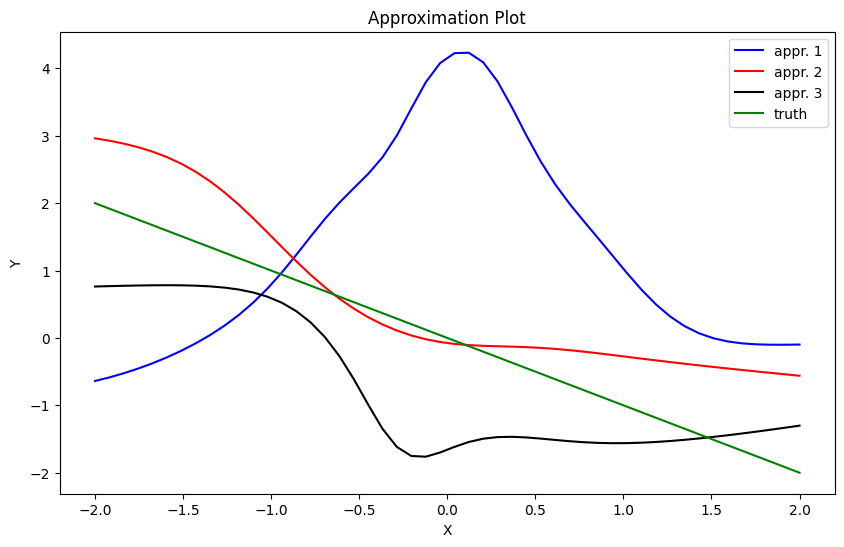

In [4]:
apprx_1 = [first_set[best_index_1].forward_pass(inputs[x]) for x in range(SIZE)]
print(apprx_1)
apprx_2 = [second_set[best_index_2].forward_pass(inputs[x]) for x in range(SIZE)]
apprx_3 = [second_set[best_index_3].forward_pass(inputs[x]) for x in range(SIZE)]
print(apprx_2)
ground_truth = [negative_identity(inputs[x]) for x in range(SIZE)]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot each time series
plt.plot(inputs, apprx_1, label="appr. 1", color="blue")
plt.plot(inputs, apprx_2, label="appr. 2", color="red")
plt.plot(inputs, apprx_3, label="appr. 3", color="black")
plt.plot(inputs, ground_truth, label="truth", color="green")

# Add labels, title, and legend
plt.title("Approximation Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()  # Display legend


# MLP Regression Task

In [7]:
# regression data in Form [x | Y]
regression_data = [
    [0.5503, -0.5894],
    [0.9206, -0.2507],
    [0.5359, -0.0468],
    [0.6081, -0.3402],
    [0.0202, 0.2857],
    [0.8545, -1.0683],
    [0.2357, 0.8605],
    [0.4847, -0.0801],
    [0.3996, 0.6837],
    [0.1957, 1.1850],
]

# Creating a MLP from Scratch

- 1 input node
- 1 hidden layer 3 hidden nodes, activation tanh
- 1 output node, activation identity


In mathematical terms we can write this as:

we have weights from input to the hidden layer: w_10 = [w1, w2, w3] (transposed)

we have weights from hidden layer to the output node : w_21 = [w3, w4, w5] (transposed)

we can write this entire MLP as follows:

$ f(x) = id(tanh(x * w_{10} - b_1) * w_{21} - b_2)$ , where id denotes the identity function and b_i the bias for the layer i

# Backpropagation












In [23]:
import numpy as np

# the quadratic cost function for exactly observation
def quadratic_error( output : float, truth : float) -> float:
     return pow(output - truth, 2)

def linear_error( output : float, truth : float) -> float:
     return abs(output - truth)

class DataLoader:

     def __init__(self, data : list[list[float , float]]):
          self.data = data
     
     def pick_tuple(self) -> tuple[float, float]:
          rand = np.random.choice(len(self.data))
          return self.data[rand][0], self.data[rand][1]

class RegressionMLP:

     def __init__(self, n_hidden_nodes, input_dis : tuple [float , float],  stopping_criterion : float , it_max : int, error_function : callable, learning_rate : float, data : list[list[float, float]]):
          self.n_hidden_nodes = n_hidden_nodes
          self.input_dis = input_dis
          self.input_matrix = self.init_parameters(self.n_hidden_nodes)
          self.output_matrix = self.init_parameters(self.n_hidden_nodes)
          self.input_bias = self.init_parameters(self.n_hidden_nodes)
          self.output_bias = self.init_parameters(1)
          self.it_max : int = it_max
          self.error_function = error_function
          self.learning_rate = learning_rate
          self.stopping_criterion = stopping_criterion
          self.data_loader : DataLoader = DataLoader(data)
     
     def activation(self, input : np.ndarray) -> np.ndarray:
          return np.tanh(input)

     def init_parameters(self, number : int) -> np.ndarray:
          return np.random.normal(self.input_dis[0], self.input_dis[1], size=(number, 1))

     def forward_pass(self, input : float) -> tuple[float , np.ndarray]:
          transposed_input_matrix = self.input_matrix.T
          transposed_bias_matrix = self.input_bias.T
          hidden_output = self.activation(np.dot(np.array([input]), transposed_input_matrix) + transposed_bias_matrix)
         # print(hidden_output.shape)
         # print(self.output_matrix.shape)
          #print(self.output_bias.shape)
          result = np.dot(hidden_output , self.output_matrix)  + self.output_bias
          #print(result.shape)
          return result , hidden_output


     def backward_pass_weights(self, y_pred, hidden_output : np.ndarray, y_actual , input_x) -> tuple[list [float], list[float]]:
          local_error_of_output = (y_pred - y_actual) * (-1)
          #print(f"local_error_of_output: {local_error_of_output}")
          local_output_layer_error : np.ndarray = local_error_of_output  * hidden_output
          #print(f"local_output_layer_error: {local_output_layer_error}")
          local_input_layer_error : np.ndarray = local_output_layer_error * input_x
          #print(f"local_input_layer_error: {local_input_layer_error}")

          self.output_matrix = self.output_matrix + self.learning_rate * local_output_layer_error.T
          #print(f"output matrix after update: {self.output_matrix}")
          self.input_matrix = self.input_matrix + self.learning_rate * input_x
          #print(f"output matrix after update: {self.input_matrix}")

          return local_output_layer_error.tolist(), local_input_layer_error.tolist(), local_error_of_output

     
     def backward_pass_biases(self) -> tuple[list[float], list[float]]:
          pass
          
     def  update_biases():
          pass

     def perform_gradient_descent(self) -> tuple[list[float], list[list[float]], list[list[float]]]:
          output_errors = []
          output_layer_error = []
          hidden_layer_error = []
          counter = 0
          error_ration = 0.5
          while (counter < self.it_max and error_ration > self.stopping_criterion ):
               input_x, y_actual = self.data_loader.pick_tuple()
               print(f"input : {input_x}")
               y_pred, hidden_output = self.forward_pass(input_x)
               local_output_layer_error , local_input_layer_error , error = self.backward_pass_weights(y_pred, hidden_output, y_actual, input_x)
               output_layer_error.append(local_output_layer_error)
               hidden_layer_error.append(local_input_layer_error)
               output_errors.append(error)
               if counter > 0:
                    error_ration = error / output_errors[counter -1]
               counter += 1

          print(f"Gradient descent yielded these weights for input matrix : {self.input_matrix}")
          print(f"Gradient descent yielded these weights for output matrix : {self.output_matrix}")
          print(f"gradient decent has yielded these biases for the hidden neurons: {self.input_bias}")

          return output_errors, local_output_layer_error, local_input_layer_error


stop_crit = 0.00001
iteratons  = 300
input_dis = [-0.5, 0.5]
learning_rate = 0.5

obj = RegressionMLP(3, input_dis , stop_crit, iteratons, quadratic_error, learning_rate, regression_data)
#input = 1.0
#y_pred , hidden_output = obj.forward_pass(1.0)
#obj.backward_pass_weights(y_pred, hidden_output, 2, input)
output_errors, local_output_layer_errors, local_input_layer_error = obj.perform_gradient_descent()
print(output_errors)
print(local_output_layer_errors)
print(local_input_layer_error)

     
          

input : 0.8545
input : 0.4847
Gradient descent yielded these weights for input matrix : [[-0.28724668]
 [-0.44606848]
 [-0.12972642]]
Gradient descent yielded these weights for output matrix : [[-0.06570698]
 [ 0.06495028]
 [ 0.37816453]]
gradient decent has yielded these biases for the hidden neurons: [[-1.28687718]
 [ 0.19972043]
 [-0.14751854]]
[array([[-1.98887211]]), array([[0.56767649]])]
[[-0.5181289772648872, -0.07559207153485972, -0.17972646579447743]]
[[-0.2511371152802908, -0.03663947707294651, -0.08711341797058321]]
